In [11]:
import pandas as pd

# Load files
hs_tree = pd.read_csv('../data/Hs_Tree.csv')
flat_table = pd.read_csv('../data/Flat_Table.csv')

hs_tree.head()
flat_table.head()


,Section,HS6,description
0,NaN,10121,"Horses; live, pure-bred breeding animals"
1,NaN,10129,"Horses; live, other than pure-bred breeding an..."
2,NaN,10130,Asses; live
3,NaN,10190,Mules and hinnies; live
4,NaN,10221,"Cattle; live, pure-bred breeding animals"


In [12]:
# Quick data check
hs_tree.info()
flat_table.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6939 entries, 0 to 6938
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HS2          97 non-null     float64
 1   HS4          1229 non-null   float64
 2   HS6          5613 non-null   float64
 3   description  6939 non-null   object 
dtypes: float64(3), object(1)
memory usage: 217.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613 entries, 0 to 5612
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Section      0 non-null      float64
 1   HS6          5613 non-null   int64  
 2   description  5613 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 131.7+ KB


In [13]:
hs_tree['description'].isnull().sum()

0

In [14]:
import re

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)  # remove punctuation
        text = text.strip()
    return text

hs_tree['description'] = hs_tree['description'].apply(clean_text)
flat_table['description'] = flat_table['description'].apply(clean_text)

In [15]:
import os

# Save into
os.makedirs('../data/clean/', exist_ok=True)
hs_tree.to_csv('../data/clean/clean_HS_Tree.csv', index=False)
flat_table.to_csv('../data/clean/clean_Flat_Table.csv', index=False)


In [31]:
hierarchy_df = pd.read_csv('../data/Hs_Tree.csv')

In [32]:
print(hierarchy_df.head())
print(hierarchy_df.columns)
print(hierarchy_df.shape)

   HS2    HS4      HS6                                        description
0  1.0    NaN      NaN           Horses; live, pure-bred breeding animals
1  NaN  101.0      NaN           Horses; live, pure-bred breeding animals
2  NaN    NaN  10121.0           Horses; live, pure-bred breeding animals
3  NaN    NaN  10129.0  Horses; live, other than pure-bred breeding an...
4  NaN    NaN  10130.0                                        Asses; live
Index(['HS2', 'HS4', 'HS6', 'description'], dtype='object')
(6939, 4)


In [33]:
print(hierarchy_df.isnull().sum())

HS2            6842
HS4            5710
HS6            1326
description       0
dtype: int64


In [34]:
hierarchy_df['HS6'] = hierarchy_df['HS6'].astype(str).str.zfill(6)
hierarchy_df['HS2'] = hierarchy_df['HS6'].str[:2]


In [35]:
hierarchy_df.to_csv('../data/clean/hs_hierarchy.csv', index=False)

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
hs2_counts = hierarchy_df.groupby('HS2')['HS6'].count()


In [40]:
print(hs2_counts)


HS2
00    1326
10      60
11      27
12      50
13      11
      ... 
94      54
95      39
96      49
97      19
99       1
Name: HS6, Length: 89, dtype: int64


In [41]:
print(hs2_counts.index)

Index(['00', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
       '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68',
       '69', '70', '71', '72', '73', '74', '75', '76', '78', '79', '80', '81',
       '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93',
       '94', '95', '96', '97', '99'],
      dtype='object', name='HS2')


In [42]:
print(hs2_counts.values)

[1326   60   27   50   11    5   53   42   17   11   19  110   24   24
   23   16   67   37   43  180  410  270   24   45   29   24   15   13
   30  108  131  111   39   20   12  128    7   11   21  101   18   20
   42  124   23   72  110   30   24   37   24   60  106  104   52   25
    8    6    8   50   30  106   93  167  124   49   17   35    8    9
   56   75   64   36  538  296   23   98   26   25  176   54   17   18
   54   39   49   19    1]


In [43]:
print(hierarchy_df[['HS2', 'HS6']].head(10))


  HS2      HS6
0  00   000nan
1  00   000nan
2  10  10121.0
3  10  10129.0
4  10  10130.0
5  10  10190.0
6  00   000nan
7  10  10221.0
8  10  10229.0
9  10  10231.0


In [44]:

print(hierarchy_df.shape)


(6939, 4)


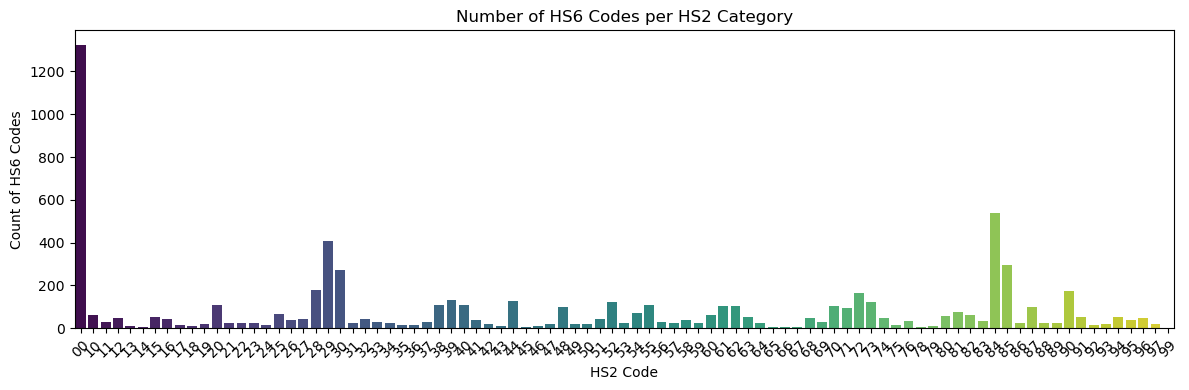

In [45]:
#PLOT 
plt.figure(figsize=(12, 4))
sns.barplot(x=hs2_counts.index, y=hs2_counts.values,palette='viridis')
plt.title('Number of HS6 Codes per HS2 Category')
plt.xlabel('HS2 Code')
plt.ylabel('Count of HS6 Codes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
hierarchy2_df = pd.read_csv('../data/Hs_Tree.csv')

In [51]:
hierarchy2_df['HS6'] = hierarchy2_df['HS6'].astype(str).str.zfill(6)
hierarchy2_df['HS4'] = hierarchy2_df['HS6'].str[:4]


In [52]:
hs4_counts = hierarchy2_df.groupby('HS4')['HS6'].count()


In [53]:
print(hs4_counts)

HS4
000n    1326
1001       4
1002       2
1003       2
1004       2
        ... 
9703       2
9704       1
9705       6
9706       2
9999       1
Name: HS6, Length: 1387, dtype: int64


In [54]:
print(hs4_counts.index)

Index(['000n', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008',
       '1012',
       ...
       '9618', '9619', '9620', '9701', '9702', '9703', '9704', '9705', '9706',
       '9999'],
      dtype='object', name='HS4', length=1387)


In [55]:
print(hs4_counts.values)

[1326    4    2 ...    6    2    1]


In [56]:
print(hierarchy2_df[['HS4', 'HS6']].head(10))


    HS4      HS6
0  000n   000nan
1  000n   000nan
2  1012  10121.0
3  1012  10129.0
4  1013  10130.0
5  1019  10190.0
6  000n   000nan
7  1022  10221.0
8  1022  10229.0
9  1023  10231.0


In [61]:
top_n = 20
top_hs4_counts = hs4_counts.head(top_n)

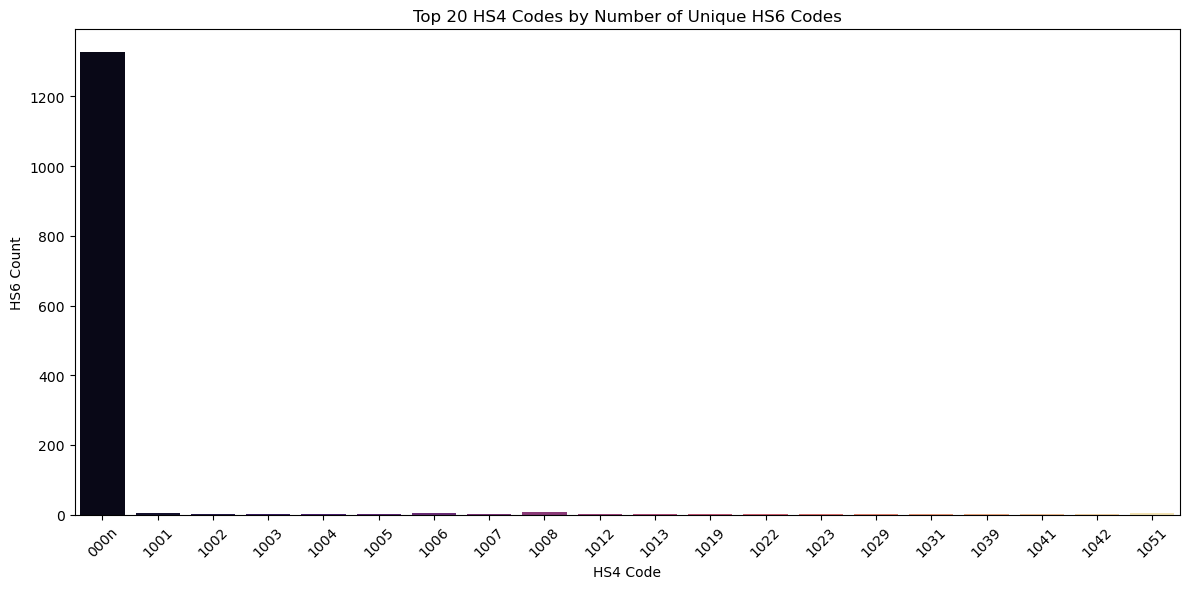

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_hs4_counts.index, y=top_hs4_counts.values, palette='magma')

plt.title(f'Top {top_n} HS4 Codes by Number of Unique HS6 Codes')
plt.xlabel('HS4 Code')
plt.ylabel('HS6 Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()